# Análisis exploratorio

Visualización de distribuciones, correlaciones y patrones temporales del dataset AI4I 2020.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style='whitegrid', palette='muted')
df = pd.read_csv(Path('../data/ai4i_clean.csv'), index_col=0)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1.0,M14860,M,298.1,308.6,1551.0,42.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,L47181,L,298.2,308.7,1408.0,46.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,L47182,L,298.1,308.5,1498.0,49.4,5.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,L47183,L,298.2,308.6,1433.0,39.5,7.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,L47184,L,298.2,308.7,1408.0,40.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0


## Histogramas de variables numéricas

Distribuciones de temperatura, velocidad, torque y desgaste para ver asimetrías y colas.

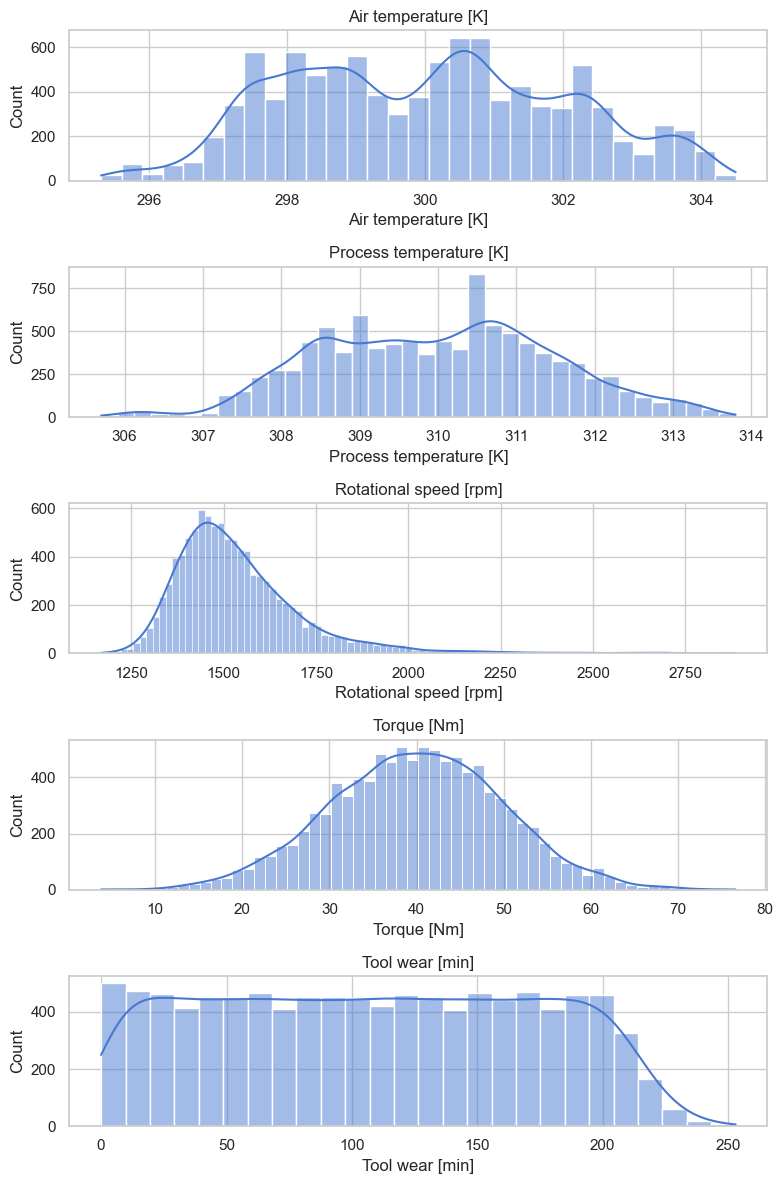

In [ ]:
numeric_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(8, 12), constrained_layout=True)
for ax, col in zip(axes, numeric_cols):
    sns.histplot(df[col], kde=True, bins=30, color='steelblue', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')
    ax.grid(True, linestyle='--', alpha=0.4)
plt.show()

## Mapas de calor y correlaciones

Heatmap de correlación entre variables numéricas y estados de fallo.

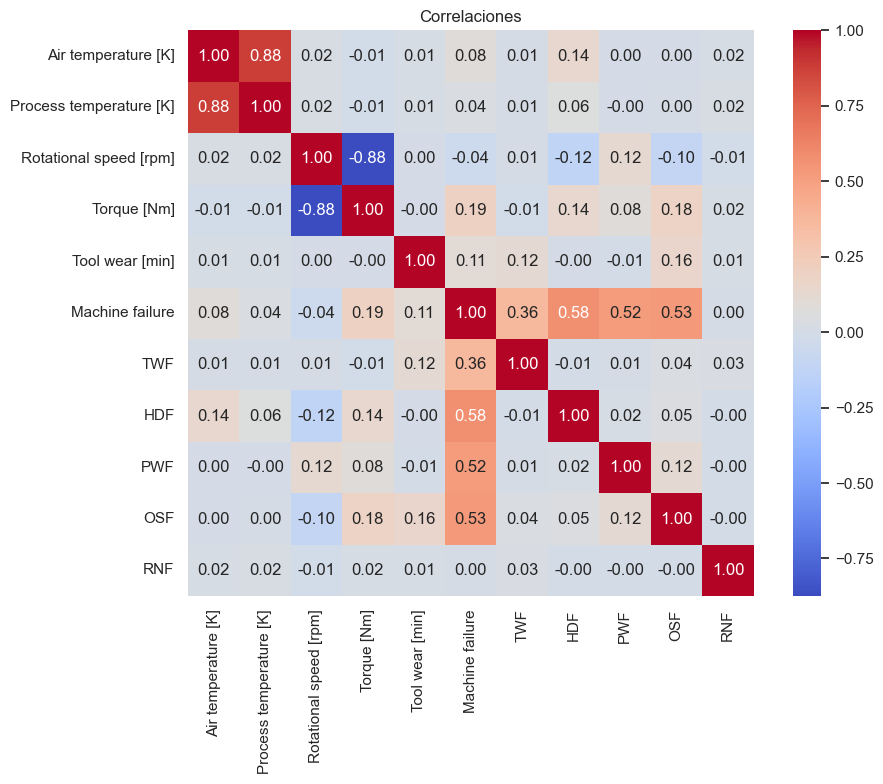

In [ ]:
feature_corr = df[numeric_cols].corr()
target_cols = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
full_corr = df[numeric_cols + target_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(feature_corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlación entre variables numéricas')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(full_corr.loc[target_cols, numeric_cols], annot=True, fmt='.2f', cmap='vlag', center=0)
plt.title('Correlación de targets con predictores')
plt.tight_layout()
plt.show()

## Boxplots según tipo de fallo

Comparar distribuciones de valores clave por cada tipo de fallo para detectar outliers.

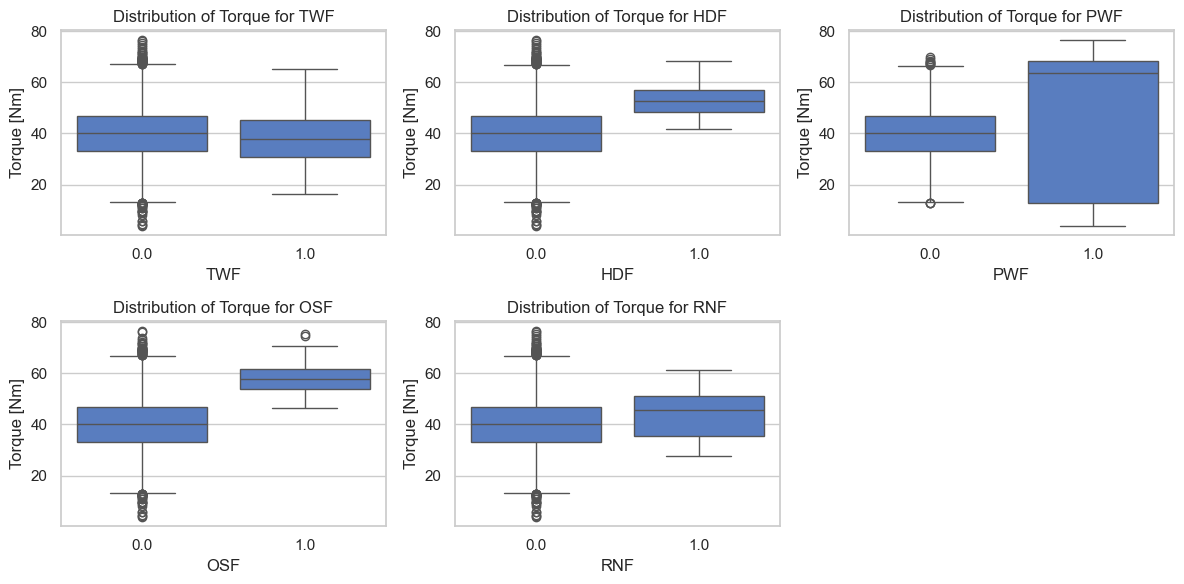

In [ ]:
failure_cols = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
fig, axes = plt.subplots(2, 3, figsize=(14, 8), constrained_layout=True)
axes = axes.flatten()
for ax, col in zip(axes, failure_cols):
    sns.boxplot(x=df[col].astype(str), y=df['Torque [Nm]'], palette='Set2', ax=ax)
    ax.set_title(f'Torque [Nm] por {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Torque [Nm]')
axes[-1].set_visible(False)
plt.suptitle('Torque vs tipos de fallo (0/1)')
plt.show()

## Componente temporal - no disponible

El dataset no incluye timestamps reales (UDI es identificador secuencial), así que no hay rolling plots temporales que se puedan interpretar.

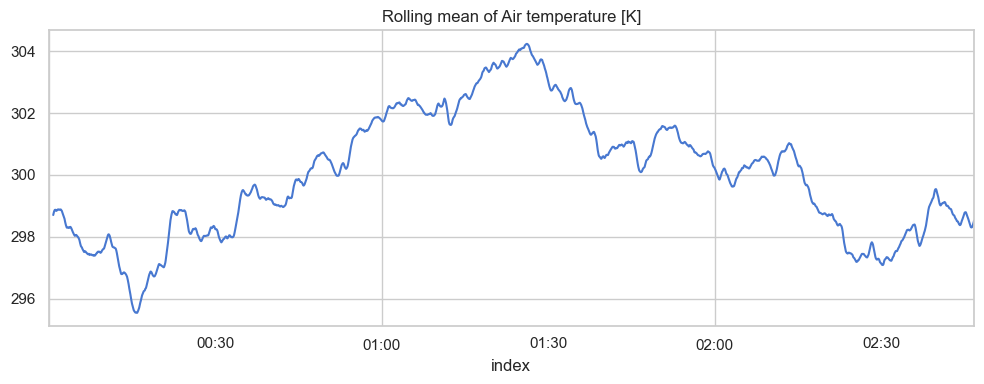

In [ ]:
print('El dataset no dispone de componente temporal significativa; UDI es un identificador no convertibles a fecha.')
